In [2]:
import numpy as np
import sympy as sp

import random
import math

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# 1

In [3]:
class Poliedr:
    def __init__(self, data, faces):
        self.points = np.array(data)
        self.faces = np.array(faces)

    def get_face_vertices(self, face_index):
        face = self.faces[face_index]
        vertices = [self.points[i] for i in face]
        return vertices

    def get_face_normal(self, face_index):
        face = self.faces[face_index]
        q1, q2, q3 = self.points[face[0]], self.points[face[1]], self.points[face[2]]
        V = q2 - q1
        W = q3 - q2
        normal = np.cross(V, W)
        normal = normal / np.linalg.norm(normal) # Нормализуем вектор нормали
        return normal

    def is_convex(self):
        for face_index in range(len(self.faces)):
            face_normal = self.get_face_normal(face_index)
            face_vertices = self.get_face_vertices(face_index)
            q1, q2, q3 = face_vertices[0], face_vertices[1], face_vertices[2]
            
            # Вычисляем уравнение плоскости для текущей грани
            A, B, C = face_normal
            D = -np.dot(face_normal, q1)
            
            left_count = 0
            right_count = 0
            
            for pj in self.points:
                if np.array_equal(pj, q1) or np.array_equal(pj, q2) or np.array_equal(pj, q3):
                    continue  # Игнорируем вершины, лежащие на грани
                
                # Вычисляем положение точки pj относительно плоскости грани
                distance = A * pj[0] + B * pj[1] + C * pj[2] + D
                
                if distance > 0:
                    right_count += 1
                elif distance < 0:
                    left_count += 1
                
                # Если найдена пара вершин, лежащих по разные стороны от грани, полиэдр невыпуклый
                if left_count > 0 and right_count > 0:
                    return False
        
        # Если после проверки всех граней не найдено пар вершин, лежащих по разные стороны от грани, полиэдр выпуклый
        return True

In [5]:
data = [
        [0, 0, 0],
        [1, 0, 0],
        [1, 1, 0],
        [0, 1, 0],
        [0, 0, 1],
        [1, 0, 1],
        [1, 1, 1],
        [0, 1, 1]
    ]
faces = [
        [0, 1, 2, 3],  # Грань 1
        [4, 5, 6, 7],  # Грань 2
        [0, 1, 5, 4],  # Грань 3
        [1, 2, 6, 5],  # Грань 4
        [2, 3, 7, 6],  # Грань 5
        [3, 0, 4, 7]   # Грань 6
    ]

poliedr = Poliedr(data, faces)

## 1.1 - 1.3

In [6]:
face_vertices = poliedr.get_face_vertices(3)
print("Вершины грани 4:", face_vertices)
face_normal = poliedr.get_face_normal(3)
print("Внешняя нормаль к грани 4:", face_normal)
print("Полиэдр выпуклый? -", poliedr.is_convex())

Вершины грани 4: [array([1, 0, 0]), array([1, 1, 0]), array([1, 1, 1]), array([1, 0, 1])]
Внешняя нормаль к грани 4: [1. 0. 0.]
Полиэдр выпуклый? - True


# 2

In [8]:
from itertools import combinations

In [11]:
def generate_dodecahedron():
    phi = (1 + np.sqrt(5)) / 2  # Золотое сечение

    # Основные координаты, нормализованные
    vertices = [
        (+1, +1, +1), (+1, +1, -1), (+1, -1, +1), (+1, -1, -1),
        (-1, +1, +1), (-1, +1, -1), (-1, -1, +1), (-1, -1, -1),
        (0, +phi, +1/phi), (0, +phi, -1/phi), (0, -phi, +1/phi), (0, -phi, -1/phi),
        (+1/phi, 0, +phi), (+1/phi, 0, -phi), (-1/phi, 0, +phi), (-1/phi, 0, -phi),
        (+phi, +1/phi, 0), (+phi, -1/phi, 0), (-phi, +1/phi, 0), (-phi, -1/phi, 0)
    ]
    vertices = np.array(vertices)

    # Находим рёбра (два конца рёбер имеют расстояние равное sqrt(2))
    edges = [
        (i, j)
        for i, j in combinations(range(len(vertices)), 2)
        if np.isclose(np.linalg.norm(vertices[i] - vertices[j]), np.sqrt(2))
    ]

    # Находим грани: по 5 вершин, каждая группа должна образовывать правильный пятиугольник
    faces = []
    for i in range(len(vertices)):
        # Находим соседние вершины
        neighbors = [j for j in range(len(vertices)) if (i, j) in edges or (j, i) in edges]
        for combination in combinations(neighbors, 4):
            face = [i] + list(combination)
            if is_pentagon(vertices, face):
                faces.append(face)

    return vertices, edges, faces

# Проверка, образуют ли вершины правильный пятиугольник
def is_pentagon(vertices, indices):
    points = vertices[indices]
    dists = [np.linalg.norm(points[i] - points[j]) for i in range(5) for j in range(i + 1, 5)]
    return len(set(np.round(dists, decimals=5))) == 2 

# Построим правильный додекаэдр и визуализируем его
vertices, _, faces = generate_dodecahedron()
dodecahedron = Poliedr(vertices, faces)

Визуализация каркасной модели додекаэдра с разноцветными гранями

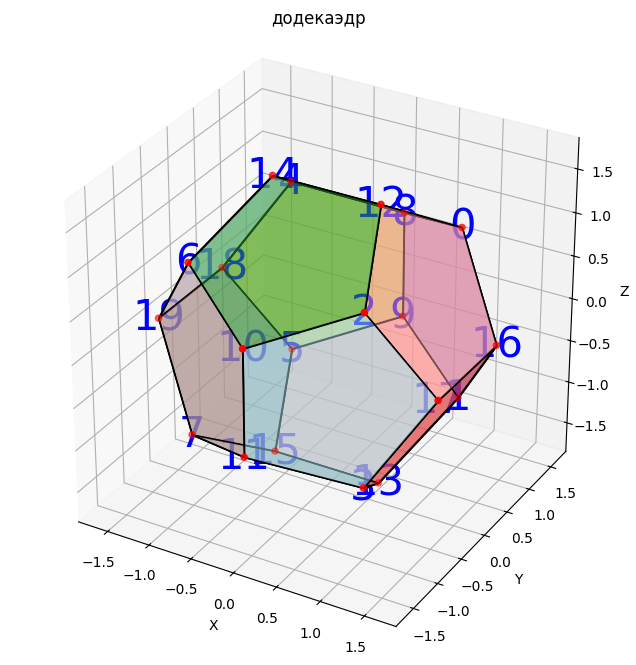

In [12]:
%run main.py

для динамики запускать файл напрямую

D:\ucheba5\kompGraph\pythonProject>python main.py